0 | 9.818835544771291
0 | 12.080140018893164
0 | 13.153501549280415
0 | 14.367804358029383
0 | 15.527066571939523
0 | 16.543970970993882
0 | 17.640958137569864
0 | 18.436766761578628
0 | 19.112540393019042
0 | 19.63963831461481
1 | 20.1272835787298
2 | 20.592206371471143
3 | 21.021085711404833
4 | 21.328355471849445
5 | 21.606570630526697
6 | 21.858877756014266
7 | 22.118866927567282
8 | 22.335242514002033
9 | 22.530596259714052


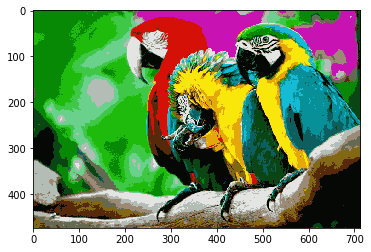

In [17]:
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
import pylab # библиотека вывода картинки на экран
import numpy as np
#from skimage.measure import PSNR
%matplotlib inline 
image = imread('parrots.jpg')
#pylab.imshow(image)
image2 = img_as_float(image)
w, h, d = original_shape = tuple(image2.shape)
assert d == 3
image_array = np.reshape(image2, (w * h, d))
sum_clusters = 0
for N in range(1,20):
    kmeans = KMeans(n_clusters=N, init='k-means++', random_state=241)  #  
    kmeans.fit(image_array)
    labels = kmeans.predict(image_array)
    image_pred = recreate_image(kmeans.cluster_centers_, labels, w, h)
#pylab.imshow(image_pred)
    PSNR = 10 * np.log10(1.0 / np.mean((image2 - image_pred) ** 2)) 
    if PSNR > 20:
        sum_clusters = sum_clusters + 1
    print(sum_clusters, "|", PSNR)
pylab.imshow(image_pred)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

 # метрика PSNR
